In [63]:
import torch
import torchvision
from torchvision.datasets import MNIST, FashionMNIST
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [64]:
#dataset = MNIST(root="data/", download=True)
#len(dataset)

In [65]:
ds = FashionMNIST(root="data/")
img, label = ds[0]
print("PIL Image:", img)

ds = FashionMNIST(root="data/", transform=transforms.ToTensor())
img, label = ds[0]
print("Tensor Image",img.shape)

PIL Image: <PIL.Image.Image image mode=L size=28x28 at 0x7F5E6F2EDA30>
Tensor Image torch.Size([1, 28, 28])


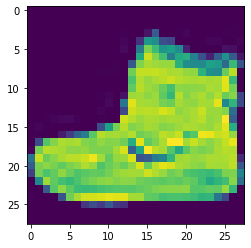

In [66]:
img, label = ds[0]
plt.imshow(img[0,:,:]) # or img.squeeze() we have to specify 0 because mtplotlib does not expect the channel idx

In [67]:
train_ds = FashionMNIST(root="data/", train=True, transform=transforms.ToTensor())
test_ds = FashionMNIST(root="data/", train=False, transform=transforms.ToTensor())

# random train-validation split

In MNIST there are 60000 trrain imgs and 10000 test ones. We just need to create the validation ds

In [68]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(ds, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

# create batches

In [69]:
from torch.utils.data.dataloader import DataLoader

In [70]:
batch_size = 10

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

# logistic regression model

In [73]:
import torch.nn as nn

In [75]:
input_size = 28*28
num_classes = 10

model = nn.Linear(input_size, num_classes)

In [79]:
print(model.weight.shape, model.bias.shape)

torch.Size([10, 784]) torch.Size([10])


We have to flatten the images because nn.inear expects a vector as input, so we flatten as 1x28x28

In [83]:
class MnistModel(nn.Module):
    
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, x_batch):
        xb = x_batch.reshape(-1,784) 
        # -1 allows to generalize the model, working with any different batch size
        out = self.linear(xb)
        return out

In [84]:
model = MnistModel(input_size, num_classes)

In [90]:
print(model.linear.weight, model.linear.bias)
list(model.parameters())

Parameter containing:
tensor([[ 5.2794e-03,  8.6137e-05, -2.5085e-02,  ..., -4.6306e-03,
          2.7690e-02,  3.0781e-02],
        [ 2.2380e-02, -3.0241e-02,  4.5789e-03,  ...,  2.1329e-02,
          3.3203e-03, -2.7799e-02],
        [-7.3639e-04,  3.0775e-02,  9.3632e-03,  ..., -8.0527e-03,
          2.7964e-02, -3.2194e-02],
        ...,
        [ 2.4584e-03, -1.7487e-02,  2.1221e-02,  ...,  1.7433e-02,
         -3.2329e-02,  6.0129e-03],
        [ 1.9399e-02, -1.5595e-02, -2.9017e-02,  ...,  2.7810e-02,
          9.0547e-03, -3.0796e-02],
        [-2.7791e-02,  3.0829e-02,  3.0640e-02,  ..., -1.3466e-02,
         -3.2816e-02,  3.3246e-02]], requires_grad=True) Parameter containing:
tensor([ 0.0306, -0.0206,  0.0217,  0.0319, -0.0275, -0.0227, -0.0011,  0.0151,
        -0.0042, -0.0355], requires_grad=True)


[Parameter containing:
 tensor([[ 5.2794e-03,  8.6137e-05, -2.5085e-02,  ..., -4.6306e-03,
           2.7690e-02,  3.0781e-02],
         [ 2.2380e-02, -3.0241e-02,  4.5789e-03,  ...,  2.1329e-02,
           3.3203e-03, -2.7799e-02],
         [-7.3639e-04,  3.0775e-02,  9.3632e-03,  ..., -8.0527e-03,
           2.7964e-02, -3.2194e-02],
         ...,
         [ 2.4584e-03, -1.7487e-02,  2.1221e-02,  ...,  1.7433e-02,
          -3.2329e-02,  6.0129e-03],
         [ 1.9399e-02, -1.5595e-02, -2.9017e-02,  ...,  2.7810e-02,
           9.0547e-03, -3.0796e-02],
         [-2.7791e-02,  3.0829e-02,  3.0640e-02,  ..., -1.3466e-02,
          -3.2816e-02,  3.3246e-02]], requires_grad=True),
 Parameter containing:
 tensor([ 0.0306, -0.0206,  0.0217,  0.0319, -0.0275, -0.0227, -0.0011,  0.0151,
         -0.0042, -0.0355], requires_grad=True)]

In [94]:
for imgs, labels in train_loader:
    out = model(imgs)
    print(out.shape)
    print(out[0])
    break

torch.Size([100, 10])
tensor([-0.1651, -0.3735,  0.0430, -0.2147, -0.2976, -0.0973,  0.4743, -0.2808,
        -0.0032,  0.2612], grad_fn=<SelectBackward>)


In [112]:
import torch.nn.functional as F
probs = F.softmax(out, dim=1)
maxs_probs, preds = torch.max(probs, dim=1)
preds

tensor([6, 6, 2, 8, 5, 6, 6, 6, 6, 2, 3, 2, 2, 6, 6, 6, 1, 6, 5, 2, 2, 6, 6, 6,
        6, 6, 6, 2, 6, 6, 6, 0, 3, 6, 6, 2, 6, 5, 6, 6, 8, 8, 6, 1, 8, 2, 2, 6,
        6, 6, 6, 2, 6, 2, 6, 1, 8, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 8, 2, 8, 8,
        2, 2, 2, 2, 6, 2, 6, 2, 2, 2, 2, 2, 6, 6, 2, 2, 6, 6, 6, 3, 2, 6, 2, 2,
        2, 2, 2, 6])

In [130]:
#accuracy
torch.sum(labels == preds)/len(labels)

tensor(0.0900)

we will use cross entropy as metric. To ge the overall loss we ake an average of the losses

In [128]:
loss = F.cross_entropy
loss(out, preds)
print(np.exp(-loss(out, preds).detach().numpy() )) 
# the predicted probability of the correct label, on average. Opposite of log

0.13489543


# optimizer

In [145]:
lr = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [184]:
def loss_batch(xb, yb, model, loss_fn, metric=None, opt = None):
    
    out = model(xb)
    loss = loss_fn(out, yb)
    
    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()
    
    metric_res = None
    if metric is not None:
        metric_res = metric(out, yb)
        
    return loss.item(), len(xb), metric_res


In [185]:
def evaluate(model, loss_fn, valid_dl, metric=None):
    
    with torch.no_grad():
        results = [loss_batch(xb, yb, model, loss_fn, metric=metric, opt=None) 
                   for xb, yb in valid_dl]
        losses, nums, metrics = zip(*results)
        total = np.sum(nums)
        avg_losses = np.sum(np.multiply(losses, nums)) / total
        
        avg_metric = None
        if metric is not None:
            avg_metric = np.sum(np.multiply(metrics, nums)) / total
        
        return avg_losses, total, avg_metric

In [186]:
def accuracy(out, labels):
    _, pred = torch.max(out, dim=1)
    accuracy = torch.sum(pred == labels).item()/len(labels)
    return accuracy

In [193]:
model = MnistModel(input_size, num_classes)
loss_fn = F.cross_entropy
valid_dl = val_loader
train_dl = train_loader

val_loss, total, val_acc = evaluate(model, loss_fn, valid_dl, metric=accuracy)
print(val_loss, total, val_acc)

2.3350609064102175 10000 0.149


In [218]:
def fit(epochs, model, loss_fn, opt, train_dl, valid_dl, metric=None):
    
    for epoch in range(epochs):
        
        for xb, yb in train_dl:
            # train step
            train_loss, _, _ = loss_batch(xb, yb, model, loss_fn, metric, opt)
            # evaluation step
            avg_eval_loss, total, avg_metric = evaluate(model, loss_fn, valid_dl, metric)
            
        if metric is not None:
            print("Epoch=", epoch, ", accuracy res:", avg_metric, ", train loss=", train_loss, ", evaluation loss=", avg_metric)
        else:
            print("Epoch=", epoch, ", train loss=", train_loss, ", evaluation loss=", avg_metric)
            
            

In [219]:
train_ds = FashionMNIST(root="data/", train=True, transform=transforms.ToTensor())
test_ds = FashionMNIST(root="data/", train=False, transform=transforms.ToTensor())

batch_size = 100

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

epochs = 5
model = MnistModel(input_size, num_classes)
loss_fn = F.cross_entropy
opt = torch.optim.SGD(model.parameters(), lr=lr)
valid_dl = val_loader
train_dl = train_loader

#fit(epochs, model, loss_fn, opt, train_dl, valid_dl, accuracy)

# test

In [220]:
test_dataset = FashionMNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

In [221]:
def predict_image(img, model):
    #define img as a batch
    xb = img.unsqueeze(0)
    print(xb.shape)
    out = model(xb)
    _, preds = torch.max(out, dim=1)
    return preds[0].item()

torch.Size([1, 1, 28, 28])
label= 0 Predicted= 4


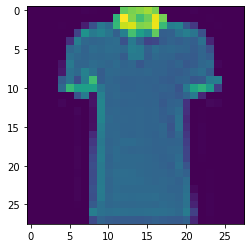

In [222]:
img, label = test_dataset[284]
plt.imshow(img[0])
print("label=", label, "Predicted=", predict_image(img, model))

# save and load

In [224]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [225]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0004,  0.0123, -0.0127,  ..., -0.0247,  0.0216, -0.0147],
                      [ 0.0122, -0.0323,  0.0295,  ..., -0.0084, -0.0263, -0.0296],
                      [ 0.0041,  0.0302,  0.0094,  ...,  0.0249,  0.0173, -0.0206],
                      ...,
                      [ 0.0167, -0.0113, -0.0267,  ..., -0.0226, -0.0150, -0.0221],
                      [-0.0220, -0.0332,  0.0005,  ...,  0.0088, -0.0021, -0.0335],
                      [ 0.0018, -0.0237, -0.0351,  ..., -0.0280,  0.0065,  0.0142]])),
             ('linear.bias',
              tensor([-0.0311, -0.0183,  0.0263, -0.0357, -0.0266, -0.0345, -0.0041, -0.0106,
                       0.0043,  0.0186]))])

In [227]:
# load
model2 = MnistModel(input_size, num_classes)
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0004,  0.0123, -0.0127,  ..., -0.0247,  0.0216, -0.0147],
                      [ 0.0122, -0.0323,  0.0295,  ..., -0.0084, -0.0263, -0.0296],
                      [ 0.0041,  0.0302,  0.0094,  ...,  0.0249,  0.0173, -0.0206],
                      ...,
                      [ 0.0167, -0.0113, -0.0267,  ..., -0.0226, -0.0150, -0.0221],
                      [-0.0220, -0.0332,  0.0005,  ...,  0.0088, -0.0021, -0.0335],
                      [ 0.0018, -0.0237, -0.0351,  ..., -0.0280,  0.0065,  0.0142]])),
             ('linear.bias',
              tensor([-0.0311, -0.0183,  0.0263, -0.0357, -0.0266, -0.0345, -0.0041, -0.0106,
                       0.0043,  0.0186]))])